# Inicjalizacja

In [1]:
import requests
import tensorflow as tf
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#pliki do nauki pod linkiem : https://aghedupl-my.sharepoint.com/:f:/g/personal/pmamos_student_agh_edu_pl/EqU9cP9q_jRBuiR489nSu7MBm48MUUj7pxSA0Wy94y6plw?e=RfV3PR

# Tworzenie datasetu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/

Mounted at /content/drive
/content


# Transformacja danych wejściowych

In [3]:

from sklearn.preprocessing import LabelEncoder

labels = np.load('labels_mfcc.npy')
data_mfcc = np.load('processed_data_mfcc.npy')
data_mfcc = data_mfcc.reshape((data_mfcc.shape[0], 26, 65, 1))

lbenc = LabelEncoder()
labels = lbenc.fit_transform(labels)
classes = lbenc.classes_

#To samo dla stft
data_mfcc_stft = np.load('processed_data_mfcc_stft.npy')
data_mfcc_stft = data_mfcc_stft.reshape((data_mfcc_stft.shape[0], 26, 65, 1))
labels_stft = np.load('labels_mfcc.npy')

labels = lbenc.fit_transform(labels_stft)
classes_stft = lbenc.classes_


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data_mfcc, labels, train_size=0.7)

# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5)

# print(X_train.shape, X_test.shape, X_valid.shape)

# X_train = np.squeeze(np.stack((X_train,) * 3, -1))
# X_test = np.squeeze(np.stack((X_test,) * 3, -1))
# X_valid = np.squeeze(np.stack((X_valid,) * 3, -1))


# print(X_train.shape, X_test.shape, X_valid.shape)

(13280, 26, 65, 1) (2846, 26, 65, 1) (2846, 26, 65, 1)
(13280, 26, 65, 3) (2846, 26, 65, 3) (2846, 26, 65, 3)


In [ ]:
# #To samo dla stft
# X_train_stft, X_test_stft, y_train_stft, y_test_stft = train_test_split(data_mfcc_stft, labels, train_size=0.7)

# X_test_stft, X_valid_stft, y_test_stft, y_valid_stft = train_test_split(X_test_stft, y_test_stft, train_size=0.5)

# print(X_train_stft.shape, X_test_stft.shape, X_valid_stft.shape)

# X_train_stft = np.squeeze(np.stack((X_train_stft,) * 3, -1))
# X_test_stft = np.squeeze(np.stack((X_test_stft,) * 3, -1))
# X_valid_stft = np.squeeze(np.stack((X_valid_stft,) * 3, -1))

# print(X_train_stft.shape, X_test_stft.shape, X_valid_stft.shape)

(13280, 26, 65, 1) (2846, 26, 65, 1) (2846, 26, 65, 1)
(13280, 26, 65, 3) (2846, 26, 65, 3) (2846, 26, 65, 3)


# Tworzenie modelu

Testowane modele (ilość parametrów, głębokość):
- MobileNet: 4.3M; 55,
- DenseNet121: 8.1M; 242,
- Xception: 22.9M;	81,
- InceptionResNetV2: 55.9M; 449,
- EfficientNetB7: 66.7M; 438,

In [ ]:
# tf.random.set_seed(42)
# tf.keras.backend.clear_session()
# n_classes = 10
# input_shape = X_train[0].shape
# print(input_shape)


(26, 65, 3)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, Reshape, LSTM, GRU
# from keras.regularizers import l1


# model = Sequential()
# # Conv Block 1
# model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# # Conv Block 2
# model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# # Conv Block 3
# model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# # Conv Block 4
# model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# # Conv Block 5
# model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu',	padding='same'))
# model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
# model.add(Dropout(0.25))

# # LSTM Block
# # model.add(Reshape((16, 64)))
# # model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=(8,128)))
# # model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
# # model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
# # model.add(Dense(units=32, kernel_regularizer=l1(0.01), activation='relu'))
# # model.add(Dense(units=10, activation='softmax', kernel_regularizer=l1(0.01)))
# # Reshape Layer for LSTM
# model.add(Reshape((1, 64)))

# # LSTM Block
# model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
# model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
# model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))

# # Fully Connected Block
# model.add(Dense(units=32, kernel_regularizer=l1(0.01), activation='relu'))
# model.add(Dense(units=10, activation='softmax', kernel_regularizer=l1(0.01)))

# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 24, 63, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 32, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 12, 32, 16)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 10, 30, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 15, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 5, 15, 32)        

In [ ]:
# from pathlib import Path
# import keras
# batch_size = 128

# logs = Path() / "my_logs" / "run_" / "Xception_v2"
# checkpoint_filepath = "my_checkpoints.Xception_v2.model.keras"

# early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
# model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=True)
# tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=logs)

# callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# # optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

# history = model.fit(X_train_stft, y_train_stft, validation_data=(X_valid_stft, y_valid_stft), epochs=150, batch_size=batch_size, callbacks=callbacks, shuffle=False)

Epoch 1/150


KeyboardInterrupt: 

67


In [5]:
from keras import layers, regularizers
import keras
model = keras.Sequential([
    keras.Input(shape=(26,65,1)),
    layers.Conv2D(256,(3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256,(3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(3),strides=(2),padding='same'),
    layers.Conv2D(256,(3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(3),strides=(2),padding='same'),
    layers.Conv2D(512,(4),padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 65, 256)       2560      
                                                                 
 batch_normalization (Batch  (None, 26, 65, 256)       1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 65, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 26, 65, 256)       1024      
 chNormalization)                                                
                                                                 
 average_pooling2d (Average  (None, 13, 33, 256)       0         
 Pooling2D)                                                      
                                                        

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_mfcc, labels, train_size=0.7)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5)

In [7]:
from pathlib import Path
import keras
batch_size = 128
logs = Path() / "my_logs" / "run_" / "Xception_v2"
checkpoint_filepath = "my_checkpoints.Xception_v2.model.keras"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=logs)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=150, batch_size=batch_size, callbacks=callbacks, shuffle=False)

Epoch 1/150
104/104 [==============================] - 45s 292ms/step - loss: 5.9780 - accuracy: 0.4024 - val_loss: 5.5020 - val_accuracy: 0.2639
Epoch 2/150
104/104 [==============================] - 22s 214ms/step - loss: 4.1498 - accuracy: 0.5370 - val_loss: 3.7643 - val_accuracy: 0.4582
Epoch 3/150
104/104 [==============================] - 24s 231ms/step - loss: 3.0602 - accuracy: 0.5970 - val_loss: 2.7557 - val_accuracy: 0.5734
Epoch 4/150
104/104 [==============================] - 24s 234ms/step - loss: 2.3509 - accuracy: 0.6312 - val_loss: 2.0161 - val_accuracy: 0.6729
Epoch 5/150
104/104 [==============================] - 23s 217ms/step - loss: 1.8662 - accuracy: 0.6645 - val_loss: 1.6351 - val_accuracy: 0.6985
Epoch 6/150
104/104 [==============================] - 22s 215ms/step - loss: 1.5554 - accuracy: 0.6837 - val_loss: 1.4699 - val_accuracy: 0.6669
Epoch 7/150
104/104 [==============================] - 23s 219ms/step - loss: 1.3202 - accuracy: 0.7074 - val_loss: 1.2076 -

In [8]:
# model.load_weights(checkpoint_filepath)

# model.load_weights("my_checkpoints.Xception_v2_2.model.keras")
model.evaluate(X_test, y_test)


89/89 [==============================] - 3s 17ms/step - loss: 0.2151 - accuracy: 0.9515


[0.21512193977832794, 0.9515109062194824]

In [16]:
X_train_stft, X_test_stft, y_train_stft, y_test_stft = train_test_split(data_mfcc_stft, labels, train_size=0.7)

X_test_stft, X_valid_stft, y_test_stft, y_valid_stft = train_test_split(X_test_stft, y_test_stft, train_size=0.5)

logs = Path() / "my_logs" / "run_" / "Xception_v2"
checkpoint_filepath = "my_checkpoints.Xception_v2.model.keras"

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=logs)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history2 = model.fit(X_train_stft, y_train_stft, validation_data=(X_valid_stft, y_valid_stft), epochs=150, batch_size=batch_size, callbacks=callbacks, shuffle=False)

Epoch 1/150
104/104 [==============================] - 25s 223ms/step - loss: 1.0372 - accuracy: 0.6969 - val_loss: 1.3061 - val_accuracy: 0.6033
Epoch 2/150
104/104 [==============================] - 23s 220ms/step - loss: 0.7012 - accuracy: 0.8061 - val_loss: 0.8464 - val_accuracy: 0.7530
Epoch 3/150
104/104 [==============================] - 24s 229ms/step - loss: 0.5663 - accuracy: 0.8543 - val_loss: 0.6119 - val_accuracy: 0.8370
Epoch 4/150
104/104 [==============================] - 24s 227ms/step - loss: 0.4726 - accuracy: 0.8916 - val_loss: 0.9579 - val_accuracy: 0.7519
Epoch 5/150
104/104 [==============================] - 24s 227ms/step - loss: 0.4040 - accuracy: 0.9136 - val_loss: 0.8284 - val_accuracy: 0.7867
Epoch 6/150
104/104 [==============================] - 24s 230ms/step - loss: 0.3539 - accuracy: 0.9306 - val_loss: 0.4955 - val_accuracy: 0.8826
Epoch 7/150
104/104 [==============================] - 22s 215ms/step - loss: 0.3093 - accuracy: 0.9477 - val_loss: 0.5440 -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [ ]:
model.load_weights("my_checkpoints.Xception_v2_2.model.keras")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'my_checkpoints.Xception_v2_2.model.keras', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
model.evaluate(X_test_stft, y_test_stft)

89/89 [==============================] - 1s 16ms/step - loss: 0.1885 - accuracy: 0.9599


[0.18853585422039032, 0.9599437713623047]

In [ ]:
# model.save_weights("my_model/Inception_82.ckpt")

In [19]:
model.save('saved_model/wlasne2_stft')

In [21]:
!zip -r /models.zip saved_model/

updating: saved_model/ (stored 0%)
updating: saved_model/wlasne2/ (stored 0%)
updating: saved_model/wlasne2/variables/ (stored 0%)
updating: saved_model/wlasne2/variables/variables.data-00000-of-00001 (deflated 7%)
updating: saved_model/wlasne2/variables/variables.index (deflated 68%)
updating: saved_model/wlasne2/assets/ (stored 0%)
updating: saved_model/wlasne2/saved_model.pb (deflated 89%)
updating: saved_model/wlasne2/fingerprint.pb (stored 0%)
updating: saved_model/wlasne2/keras_metadata.pb (deflated 93%)
updating: saved_model/wlasne2_stft/ (stored 0%)
updating: saved_model/wlasne2_stft/variables/ (stored 0%)
updating: saved_model/wlasne2_stft/variables/variables.data-00000-of-00001 (deflated 7%)
updating: saved_model/wlasne2_stft/variables/variables.index (deflated 68%)
updating: saved_model/wlasne2_stft/assets/ (stored 0%)
updating: saved_model/wlasne2_stft/saved_model.pb (deflated 89%)
updating: saved_model/wlasne2_stft/fingerprint.pb (stored 0%)
updating: saved_model/wlasne2_s

In [23]:
from google.colab import files
files.download("/models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
!zip -r /model_logs.zip my_logs/run_/20240512_095805 my_logs/run_/Xception_v2/ my_logs/run_/Xception_v2_2

	zip warning: name not matched: my_logs/run_/20240512_095805
	zip warning: name not matched: my_logs/run_/Xception_v2_2
updating: my_logs/run_/Xception_v2/ (stored 0%)
updating: my_logs/run_/Xception_v2/train/ (stored 0%)
updating: my_logs/run_/Xception_v2/train/events.out.tfevents.1716062473.8878e9d2172a.290.0.v2 (deflated 89%)
updating: my_logs/run_/Xception_v2/validation/ (stored 0%)
updating: my_logs/run_/Xception_v2/validation/events.out.tfevents.1716062516.8878e9d2172a.290.1.v2 (deflated 78%)
  adding: my_logs/run_/Xception_v2/train/events.out.tfevents.1716065709.8878e9d2172a.290.2.v2 (deflated 89%)
  adding: my_logs/run_/Xception_v2/validation/events.out.tfevents.1716065732.8878e9d2172a.290.3.v2 (deflated 79%)


In [25]:
from google.colab import files
files.download("/model_logs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import pickle
model.save('my_model_stft.h5')
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/89 [==============================] - 2s 19ms/step
The Test Accuracy is 0.9609978917779339 
 The F1 Score is 0.9609978917779339


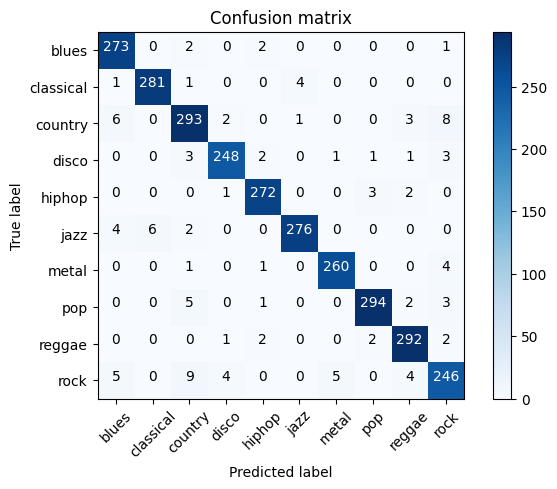

In [27]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score , accuracy_score
import keras


model = keras.saving.load_model('my_model_stft.h5')
pred = model.predict(X_valid_stft)
preds = []
for i in pred:
    out = np.argmax(i)
    preds.append(out)
f1score = f1_score(y_valid_stft,preds,average='micro')
accuracy = accuracy_score(y_valid_stft,preds)

print(f"The Test Accuracy is {accuracy} \n The F1 Score is {f1score}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid_stft,preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes_stft))
plt.xticks(tick_marks, classes_stft, rotation=45)
plt.yticks(tick_marks, classes_stft)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

89/89 [==============================] - 2s 16ms/step
The Test Accuracy is 0.9508081517919887 
 The F1 Score is 0.9508081517919887


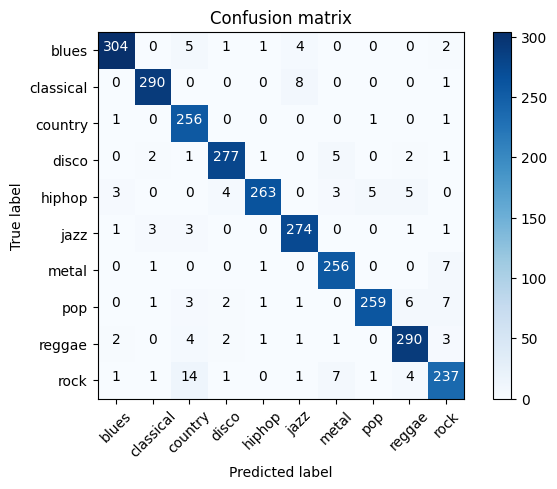

In [30]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score , accuracy_score
import keras


model = keras.saving.load_model('my_model.h5')
pred = model.predict(X_valid)
preds = []
for i in pred:
    out = np.argmax(i)
    preds.append(out)
f1score = f1_score(y_valid,preds,average='micro')
accuracy = accuracy_score(y_valid,preds)

print(f"The Test Accuracy is {accuracy} \n The F1 Score is {f1score}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid,preds)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()